In [10]:
import pandas as pd
import numpy as np
import rapid_review as rr
import os
import matplotlib.pyplot as plt
import importlib
from sklearn.svm import SVC, OneClassSVM
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import ast

In [2]:
importlib.reload(rr)

dfs = []
for path in [("ProtonBeam","all"),("COPD","copd")]:
    document_index = rr.parse_pb_xml(f'../data/{path[0]}/{path[1]}.xml')
    document_index = document_index.drop_duplicates()
    document_index['rec-number'] = document_index['rec-number'].astype(int)
    
    relevant_index = pd.read_csv(
    f'../data/{path[0]}/relevant.txt',header=None,
    names=["rec-number"])
    
    relevant_index['relevant'] = 1
    
    df = pd.merge(
        document_index,
        relevant_index,
        how="left"
    )
    
    df['review'] = path[0]
    dfs.append(df)
    
df = pd.concat(dfs)
df['relevant'] = df['relevant'].fillna(0)    
df.head()

,ab,rec-number,ti,relevant,review
0,None,2201,Proton radiation for acromegaly,0.0,ProtonBeam
1,Particle radiation therapy has the potential f...,2202,Particle radiation therapy,0.0,ProtonBeam
2,The Program for Particle Therapy proposes util...,2203,Proposal for a program in particle-beam radiat...,0.0,ProtonBeam
3,None,2204,[Congress on linear accelerators: radioprotect...,0.0,ProtonBeam
4,None,2205,Particle accelerators in radiation therapy. Pr...,0.0,ProtonBeam


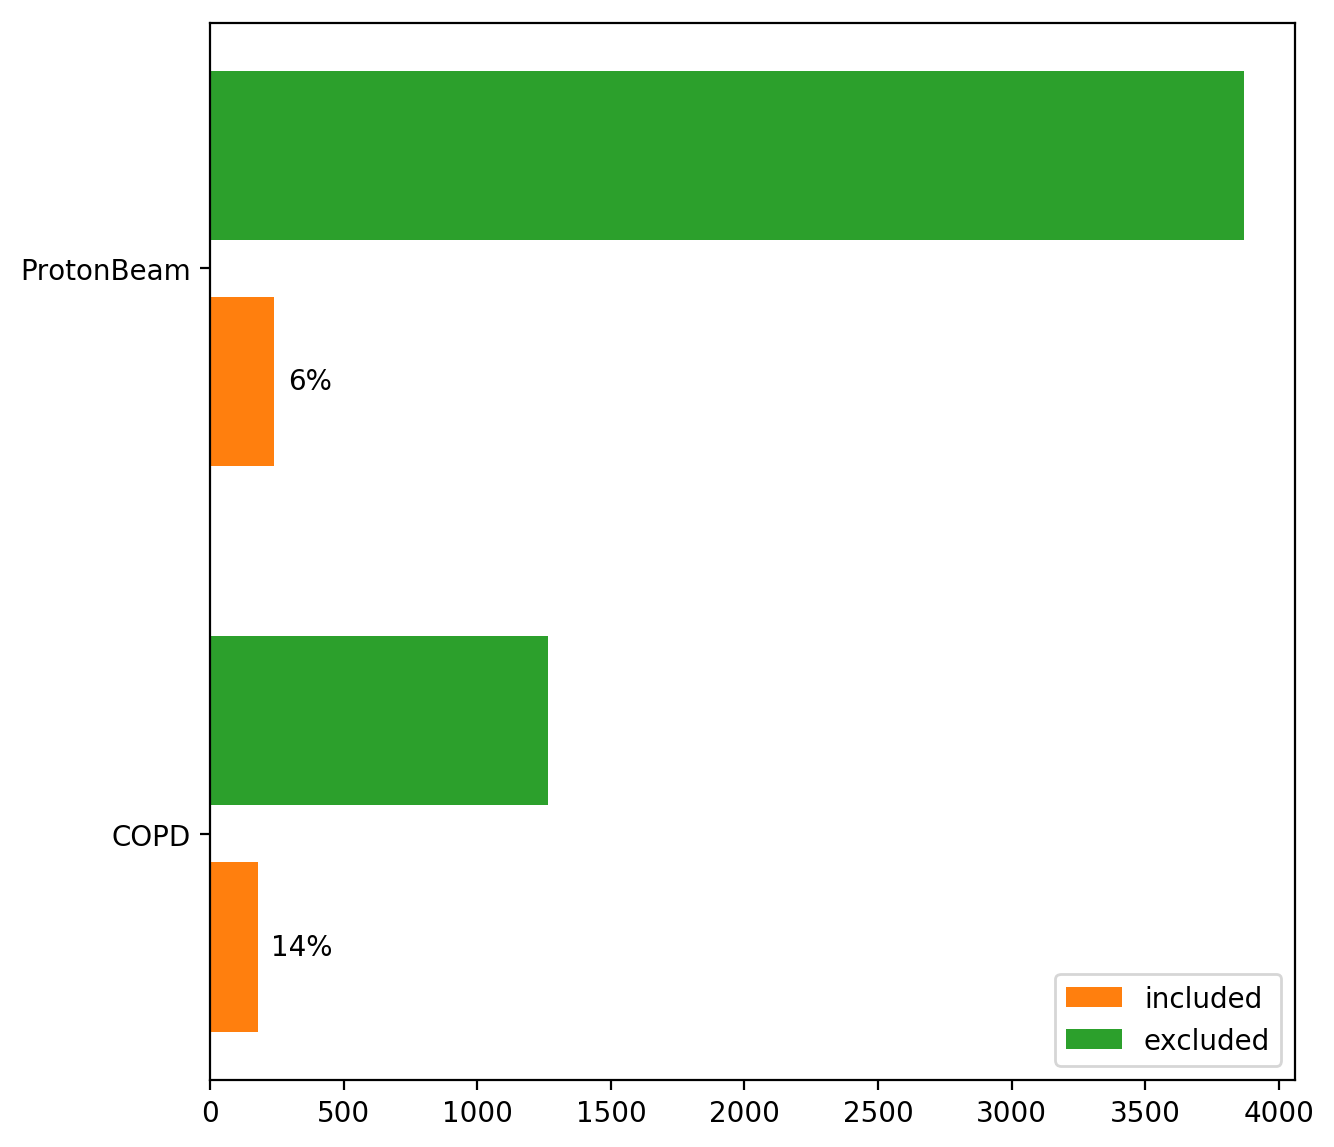

In [3]:
fig, ax = plt.subplots(figsize=(7,7),dpi=200)

cm = plt.cm.RdYlBu


ticklabels = []
for i, (name, group) in enumerate(df.groupby('review')):
    if i==0:
        l1="included"
        l2="excluded"
    else:
        l1 = None
        l2 = None
        
    group = group.dropna()
    included = group[group['relevant']==1].shape[0]
    excluded = group[group['relevant']==0].shape[0]
    ax.barh(i-0.2, included, height=0.3, color='C1',label=l1)
    ax.barh(i+0.2, excluded, height=0.3, color='C2', label=l2)
    ax.text(included+50, i-0.2, f'{included/excluded:.0%}', ha="left", va="center")
    ticklabels.append(name)
        
ax.set_yticks([i for i,v in enumerate(ticklabels)])
ax.set_yticklabels(ticklabels)

ax.legend()
    
    
plt.show()

In [4]:
group

,ab,rec-number,ti,relevant,review
1,Particle radiation therapy has the potential f...,2202,Particle radiation therapy,0.0,ProtonBeam
2,The Program for Particle Therapy proposes util...,2203,Proposal for a program in particle-beam radiat...,0.0,ProtonBeam
17,Chordomas of the base of the skull are rare. T...,1802,Proton therapy for base of skull chordoma: a r...,0.0,ProtonBeam
21,A brief consideration of the hardware and soft...,2217,[Measuring equipment for communication with a ...,0.0,ProtonBeam
22,"In recent decades, radiation research has conc...",1277,SU5416 and SU6668 attenuate the angiogenic eff...,0.0,ProtonBeam
24,"Chinese hamster cells (V79-4), human lymphocyt...",2219,[Damage by gamma rays and heavy ions to superh...,0.0,ProtonBeam
25,In a recent study (Int. J. Radiat. Oncol. Biol...,118,Evaluation of lactate as a 1H nuclear magnetic...,0.0,ProtonBeam
26,48 patients with muscle invasive bladder cance...,2220,Long-term morbidity after curative radiotherap...,0.0,ProtonBeam
30,The paper reviews experimental and clinical da...,1803,[Probability of lens opacity and mature catara...,0.0,ProtonBeam
31,"With regard to vesica tumors, a remarkable dif...",2223,[Radiotherapy of tumors of the bladder and ure...,0.0,ProtonBeam


[Text(0, 0, '0.0'), Text(0, 0, '1.0')]

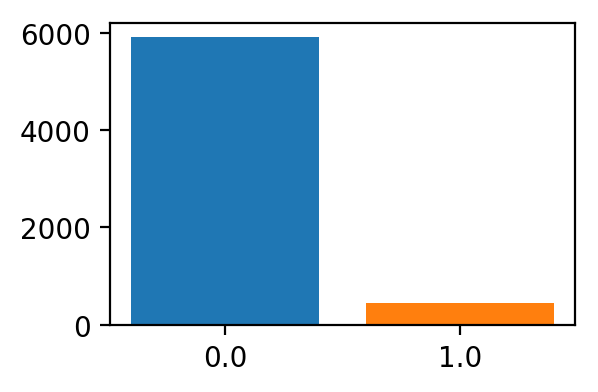

In [5]:
fig, ax = plt.subplots(figsize=(3,2),dpi=200)

ticks = []
labels = []
for i, (name, group) in enumerate(df.groupby('relevant')):
    ax.bar(i, group.shape[0])
    ticks.append(i)
    labels.append(name)
    
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

In [11]:
importlib.reload(rr)

results = []
iterations = 1

df['x'] = df['ab']

recalculate = False
if recalculate:
    for name, group in df.groupby('review'):
        group = group.dropna().reset_index(drop=True)

        if name != "COPD":
            continue
        models = [
            SVC(kernel='linear',class_weight='balanced',probability=True)
            #MultinomialNB(alpha=0.1)    
            #MLPClassifier(
            #    solver='lbfgs', 
            #    alpha=0.1,
            #    hidden_layer_sizes=(10), 
            #    random_state=1
            #)
        ]

        ss = rr.ScreenScenario(
            group, models, 300, [50,100,200], name
        )
        for i in range(iterations):
            results.append(ss.screen(i, True))

    results_df = pd.DataFrame.from_dict(results)
else:
    results_df = pd.read_csv('../results/results_pb_copd.csv') 
    for p in ["estimated_recall_path", "recall_track", "work_track","random_work_track","random_recall_track"]:
        results_df[p] = results_df[p].apply(ast.literal_eval)
    
results_df.head()

,N,bir,bir_upperbound,dataset,estimated_missed,estimated_p_ub,estimated_r_docs,estimated_recall_min,estimated_recall_path,irrelevant_heuristic,...,seen_docs,work_track,wss95_bir,wss95_bir_ci,wss95_ih,wss95_ih_100,wss95_ih_200,wss95_ih_50,wss95_pf,wss95_rs
0,1443,0.130,0.184172,COPD,0.0,0.124047,179,1.0,"[0.28805237315875615, 0.32234432234432236, 0.3...","[50, 100, 200]",...,1443,"[0.1392931392931393, 0.13998613998613998, 0.14...",0.000000,0.0,NaN,0.399168,0.334026,0.495495,0.585586,0.219681
1,1443,0.100,0.150066,COPD,0.0,0.124047,179,1.0,"[0.2962962962962963, 0.3308270676691729, 0.362...","[50, 100, 200]",...,1443,"[0.1392931392931393, 0.13998613998613998, 0.14...",0.721414,0.0,NaN,0.268884,0.199584,0.580042,0.546085,0.235620
2,1443,0.105,0.155812,COPD,0.0,0.124047,179,1.0,"[0.2962962962962963, 0.3308270676691729, 0.362...","[50, 100, 200]",...,1443,"[0.1392931392931393, 0.13998613998613998, 0.14...",0.708940,0.0,NaN,0.347886,0.347886,0.514900,0.580735,0.192654
3,1443,0.100,0.150066,COPD,0.0,0.124047,179,1.0,"[0.2962962962962963, 0.3308270676691729, 0.362...","[50, 100, 200]",...,1443,"[0.1392931392931393, 0.13998613998613998, 0.14...",0.729037,0.0,NaN,0.439362,0.197505,0.474012,0.596674,0.235620
4,1443,0.115,0.167225,COPD,0.0,0.124047,179,1.0,"[0.31494661921708184, 0.35247524752475246, 0.3...","[50, 100, 200]",...,1443,"[0.1392931392931393, 0.13998613998613998, 0.14...",0.661816,0.0,NaN,0.366597,0.227304,0.489951,0.589051,0.217602


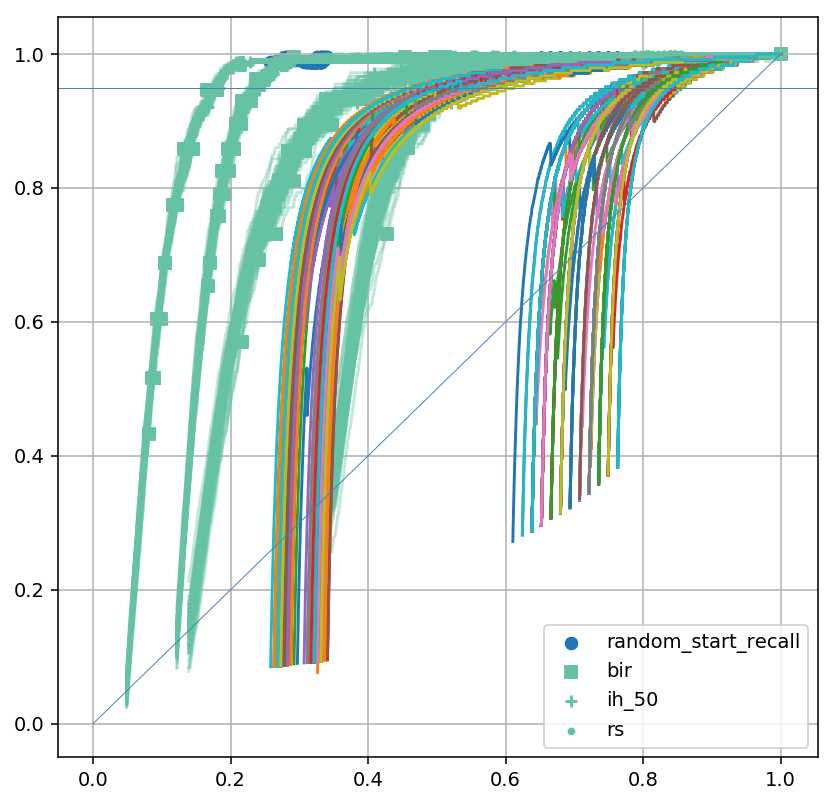

In [12]:


fig, ax = plt.subplots(figsize=(7,7),dpi=140)
colors = ['#66c2a5','#fc8d62','#8da0cb']

a = 0.4

pdf = results_df[results_df['N'] > 1000]

for i, p in pdf.iterrows():

    ax.plot(p['work_track'], p['recall_track'], c = colors[0], alpha=a)
    ax.plot(p['random_work_track'], p['random_recall_track'], c = colors[0], alpha=a, linestyle="--")
    ax.plot(p['random_work_track'], p['estimated_recall_path'])
    
s_crit = ["bir","ih_50","rs"]

import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*')) 

ax.scatter(pdf['random_start_work'],pdf['random_start_recall'])

for s in s_crit:
    ax.scatter(
        1- pdf[f'wss95_{s}'], 
        pdf[f'recall_{s}'], 
        c = colors[0], marker = next(marker),
        label = s
    )
    
ax.axhline(0.95, color="steelblue",lw=0.5)
ax.plot([0,1],[0,1], color="steelblue", lw=0.5)
ax.legend()
ax.grid()

plt.show()

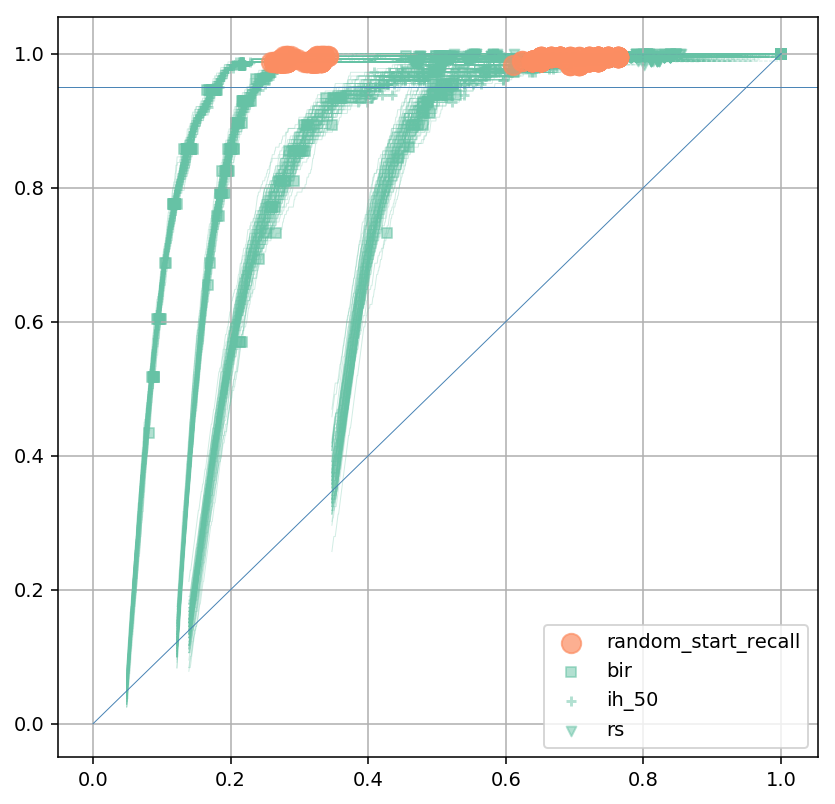

In [29]:
fig, ax = plt.subplots(figsize=(7,7),dpi=140)
colors = ['#66c2a5','#fc8d62','#8da0cb']

a = 0.3
size = 25

pdf = results_df[results_df['N'] > 1000]

for i, p in pdf.iterrows():

    ax.plot(p['work_track'], p['recall_track'], c = colors[0], alpha=a, lw=0.5)
    ax.plot(p['random_work_track'], p['random_recall_track'], c = colors[0], alpha=a, linestyle="--", lw=0.5)
    #ax.plot(p['random_work_track'], p['estimated_recall_path'])
    
s_crit = ["bir","ih_50","rs"]

import itertools
marker = itertools.cycle((',', '+', 'v', 'o', '*')) 

ax.scatter(pdf['random_start_work'],pdf['random_start_recall'],c=colors[1],s=size*4,alpha=a+0.4, zorder=5)

for s in s_crit:
    ax.scatter(
        1- pdf[f'wss95_{s}'], 
        pdf[f'recall_{s}'], 
        c = colors[0], marker = next(marker),
        label = s,
        s = size,
        alpha=a+0.2
    )
    
ax.axhline(0.95, color="steelblue",lw=0.5)
ax.plot([0,1],[0,1], color="steelblue", lw=0.5)
ax.legend()
ax.grid()

plt.show()

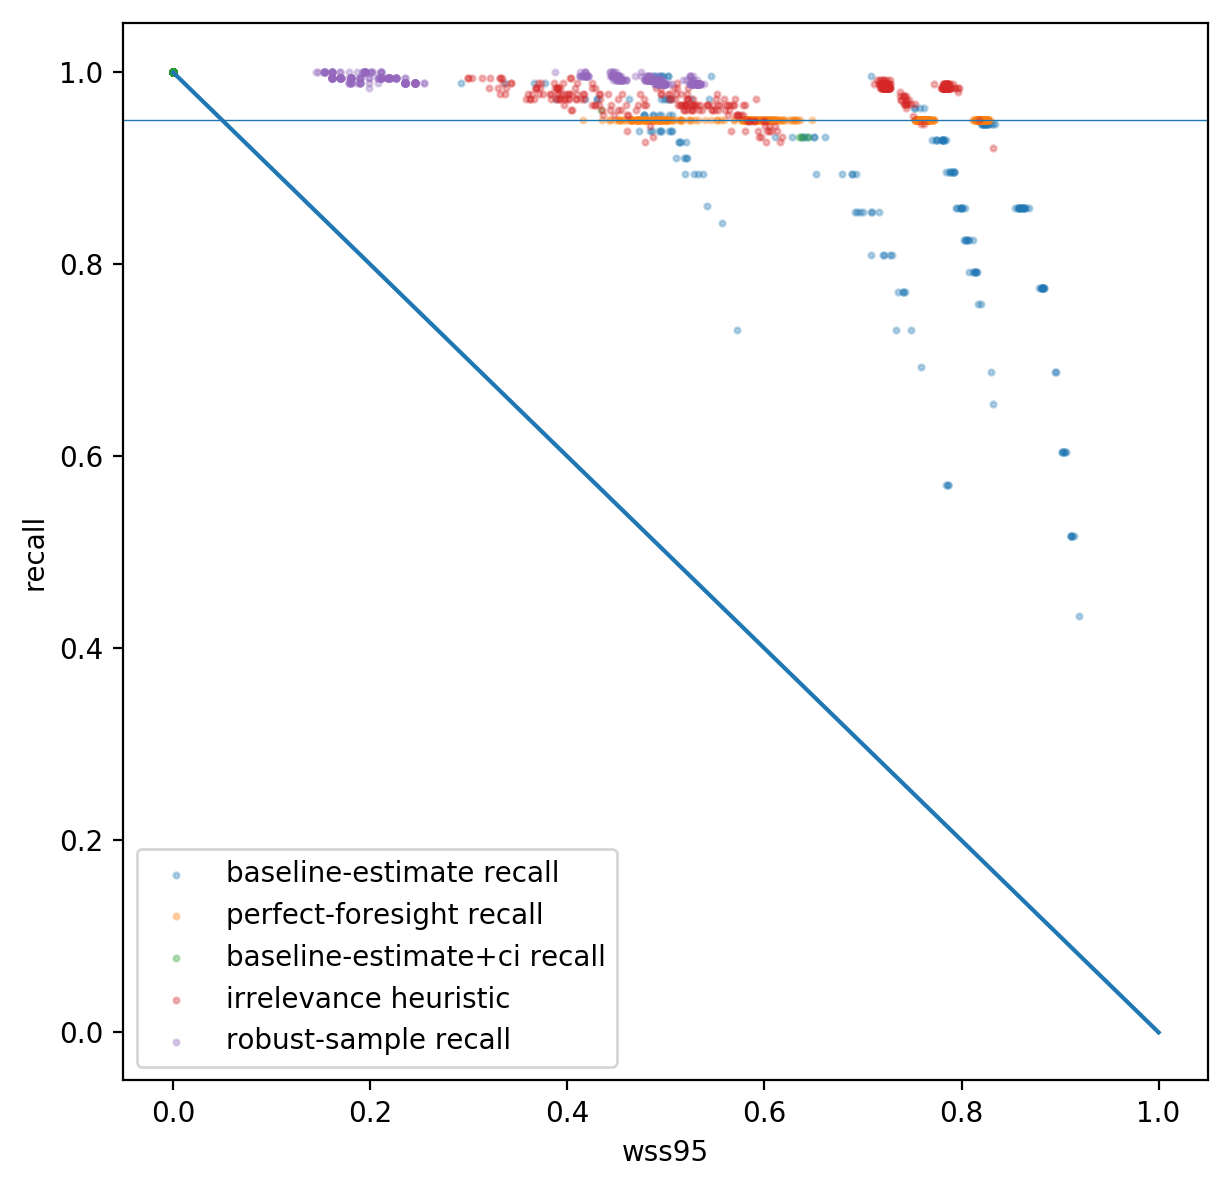

In [16]:
fig, ax = plt.subplots(figsize=(7,7),dpi=200)
s = 4
a = 0.3
ax.scatter(
    results_df['wss95_bir'], results_df['recall_bir'], 
    alpha=a, 
    label="baseline-estimate recall",
    s=s
)
ax.scatter(
    results_df['wss95_pf'], 
    [0.95 for x in results_df['recall_pf']], 
    alpha=a,
    label="perfect-foresight recall",
    s=s
)

ax.scatter(
    results_df['wss95_bir_ci'], 
    results_df['recall_bir_ci'], 
    alpha=a,
    label="baseline-estimate+ci recall",
    s=s
)

ax.scatter(
    results_df['wss95_ih_50'], 
    results_df['recall_ih_50'], 
    alpha=a,
    label="irrelevance heuristic",
    s=s
)

ax.scatter(
    results_df['wss95_rs'], results_df['recall_rs'], 
    alpha=a, 
    label="robust-sample recall",
    s=s
)

ax.legend()
ax.set_ylabel('recall')
ax.set_xlabel('wss95')

ax.plot([1,0],)

ax.axhline(0.95, lw=0.5)
plt.show()

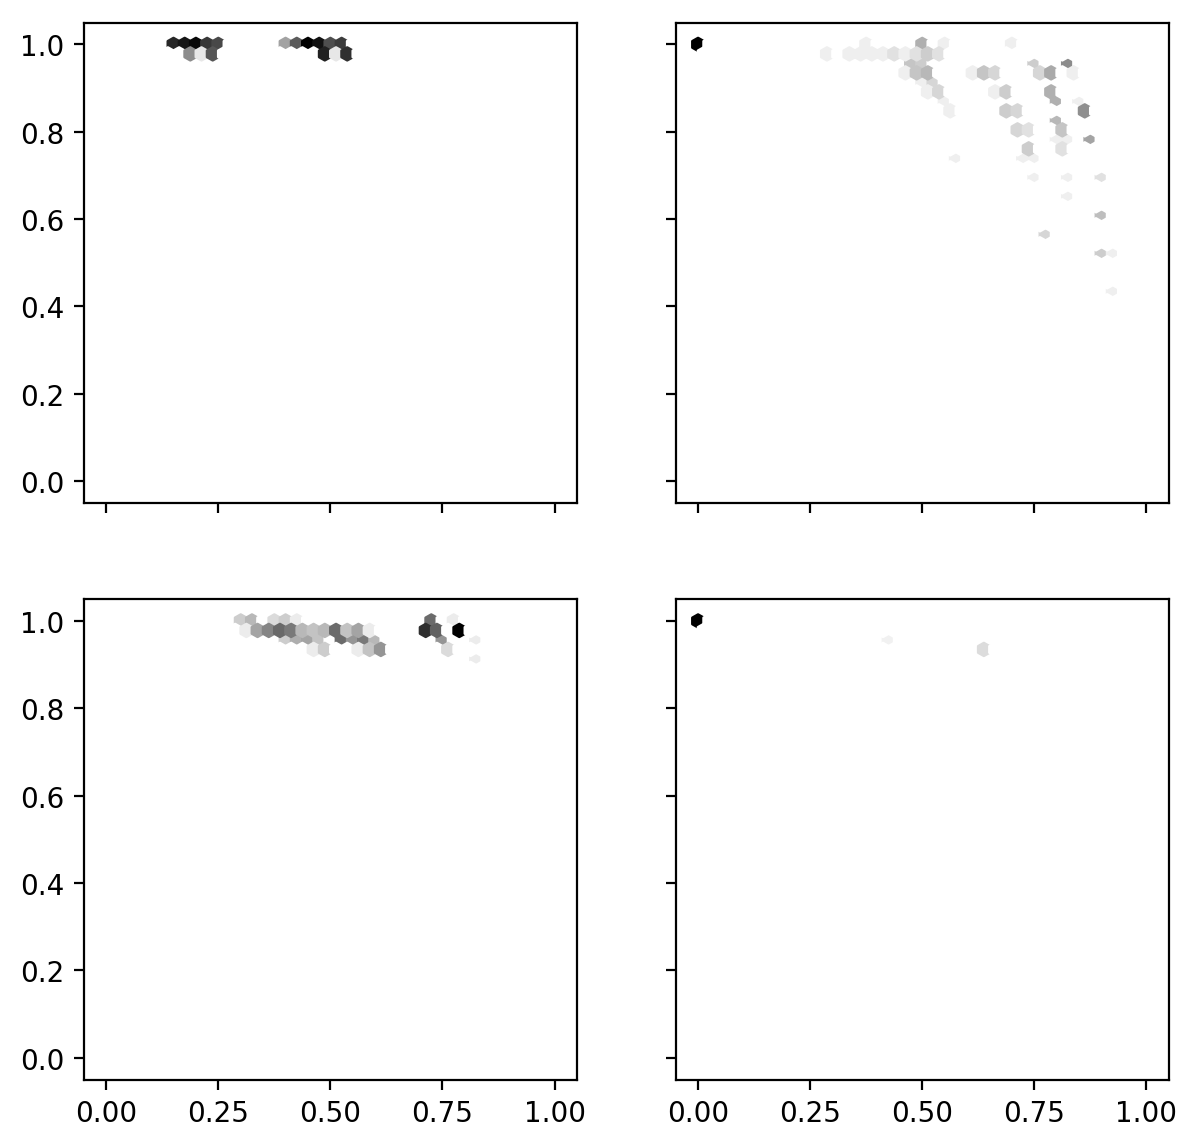

In [20]:
fig, axs = plt.subplots(2,2,figsize=(7,7),dpi=200,sharey=True, sharex=True)


for i, ss in enumerate(['_rs','_bir','_ih_50','_bir_ci']):
    ax = axs[i//2][i%2]
    ax.hexbin(
        results_df[f'wss95{ss}'], 
        results_df[f'recall{ss}'], 
        gridsize=40, 
        mincnt=0,
        cmap="Greys",
        bins="log",
        extent=[0, 1, 0, 1]
    )
plt.show()    